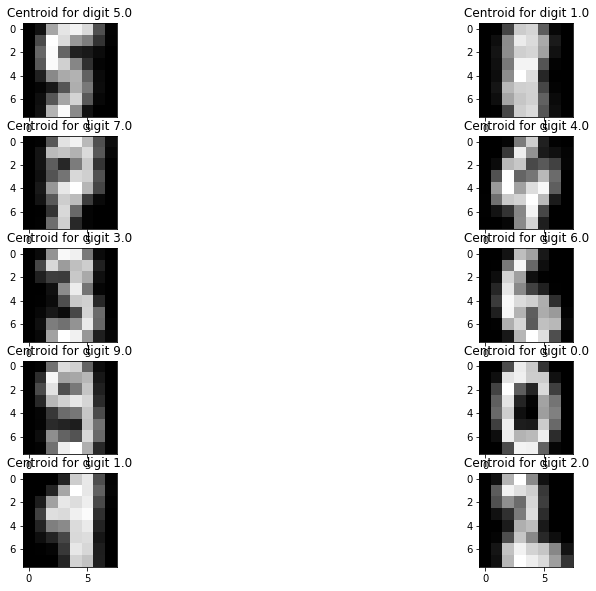

In [6]:
#Task 1
from scipy.cluster.vq import kmeans
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import numpy as np
def sub_outer(a, b):
    return a[:, None] - b[None, :]
def get_label(obs, centroids):
            sustractedCubeMatrix = sub_outer(obs, centroids) 
            dist = np.linalg.norm(sustractedCubeMatrix, axis=2)
            labels = np.argmin(dist, axis=1) 
            return labels
digits=load_digits()
k=10
Cdigits = digits.images.reshape((digits.images.shape[0], -1))
centroids, distortion=kmeans(Cdigits,k)
labels=get_label(Cdigits, centroids)
digit_cluster=np.zeros(10)
for i in range(k):
    digit_cluster[i]=np.argmax(np.bincount(digits.target[labels == i]))
plt.figure(figsize=(15,10))
for i in range(10):
    plt.subplot(5, 2, i + 1)
    plt.title('Centroid for digit {}'.format(digit_cluster[i]))
    plt.imshow(centroids[i].reshape((8, 8)), cmap='gray')
#print(centroids)
#Cdigits = digits.images.reshape((digits.images.shape[0], -1))
#flattened_images.shape

In [2]:
#Task 2
#print(digits.images.shape[0])
def percent_of_error(k_means_predictions, real_values):
    return np.count_nonzero(k_means_predictions!=real_values)/real_values.size
k_means_predictions=np.zeros(digits.images.shape[0])
for i in range(digits.images.shape[0]):
    k_means_predictions[i]=digit_cluster[labels[i]]
print('Общая', percent_of_error(k_means_predictions, digits.target))
print('\n')
for i in range(10):
    print('Цифра',i,percent_of_error(k_means_predictions[digits.target==i],digits.target[digits.target==i]))
    print('\n')
#np.count_nonzero(y_true != y_pred) / y_true.size
#print(k_means_predictions)
#print('\n')
#print(labels)

Общая 0.20589872008903728


Цифра 0 0.0056179775280898875


Цифра 1 0.6978021978021978


Цифра 2 0.1638418079096045


Цифра 3 0.15846994535519127


Цифра 4 0.09392265193370165


Цифра 5 0.25274725274725274


Цифра 6 0.022099447513812154


Цифра 7 0.01675977653631285


Цифра 8 0.41954022988505746


Цифра 9 0.22777777777777777




[[177.   0.   0.   0.   1.   0.   0.   0.   0.   0.]
 [  0.  55.  24.   1.   0.   1.   2.   0.  99.   0.]
 [  1.   2. 148.  13.   0.   0.   0.   3.   8.   2.]
 [  0.   0.   0. 154.   0.   2.   0.   7.   7.  13.]
 [  0.   5.   0.   0. 164.   0.   0.   8.   4.   0.]
 [  0.   0.   0.   1.   2. 136.   1.   0.   0.  42.]
 [  1.   1.   0.   0.   0.   0. 177.   0.   2.   0.]
 [  0.   0.   0.   0.   0.   0.   0. 176.   3.   0.]
 [  0.   5.   3.   2.   0.   4.   2.   5. 101.  52.]
 [  0.  20.   0.   6.   0.   6.   0.   7.   2. 139.]]


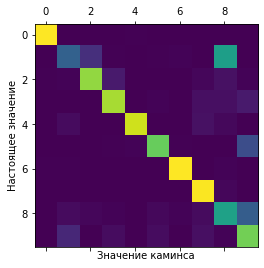

In [3]:
#Task 3
matrix=np.zeros(100).reshape(10,10)
for i in range(10):
    for j in range(10):
        matrix[i,j]=np.count_nonzero((k_means_predictions==j)&(digits.target==i))
print(matrix)
plt.matshow(matrix)
plt.ylabel('Настоящее значение')
plt.xlabel('Значение каминса')
plt.show()
#видно, что 2 очень плохо угадывается, а также 5 и 8, каминс считает их за 8, 9 и 8 соответственно. Хорошо угадывается 0, 4, 5,6

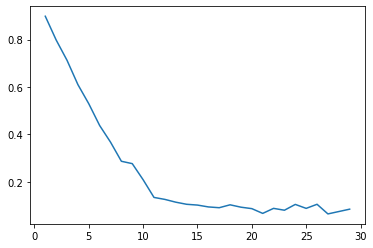

In [4]:
def percent_errors(k):
            digits=load_digits()
            Cdigits = digits.images.reshape((digits.images.shape[0], -1))
            centroids, distortion=kmeans(Cdigits,k)
            labels=get_label(Cdigits, centroids)
            digit_cluster=np.zeros(k)
            for i in range(k):
                digit_cluster[i]=np.argmax(np.bincount(digits.target[labels == i]))
            k_means_predictions=np.zeros(digits.images.shape[0])
            for i in range(digits.images.shape[0]):
                k_means_predictions[i]=digit_cluster[labels[i]]
            return percent_of_error(k_means_predictions, digits.target)
error=[percent_errors(k) for k in range(1,30)]
plt.plot(range(1,30),error)
# можно взять 15, так как потом ошибки уже не сиьно меняются

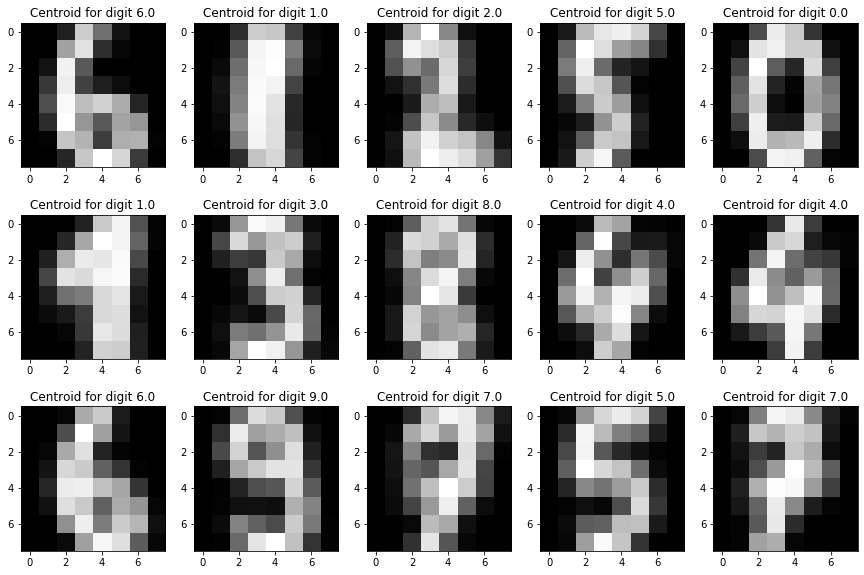

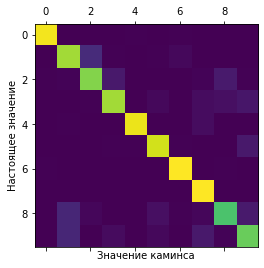

In [5]:
#Task 5
digits=load_digits()
k=15
Cdigits = digits.images.reshape((digits.images.shape[0], -1))
centroids, distortion=kmeans(Cdigits,k)
labels=get_label(Cdigits, centroids)
digit_cluster=np.zeros(k)
for i in range(k):
    digit_cluster[i]=np.argmax(np.bincount(digits.target[labels == i]))
plt.figure(figsize=(15,10))
k_means_predictions=np.zeros(digits.images.shape[0])
for i in range(digits.images.shape[0]):
    k_means_predictions[i]=digit_cluster[labels[i]]
matrix2=np.zeros(100).reshape(10,10)
for i in range(10):
    for j in range(10):
        matrix2[i,j]=np.count_nonzero((k_means_predictions==j)&(digits.target==i))
for i in range(k):
    plt.subplot(3, 5, i + 1)
    plt.title('Centroid for digit {}'.format(digit_cluster[i]))
    plt.imshow(centroids[i].reshape((8, 8)), cmap='gray')
plt.matshow(matrix2)
plt.ylabel('Настоящее значение')
plt.xlabel('Значение каминса')
plt.show()
#точность однозначно повысилась, если судить по confusion matrix, стали отделяться разные написания чисел, например единица
#палкой или нормальная